In [1]:
url="https://www.dropbox.com/home?preview=session_challenger_dropboxdownload.pcap"

In [2]:
import urllib
urllib.urlretrieve(url, "/home/rufina/Documents/github-dropbox/rename/dropboxdownload.pcap")

('/home/rufina/Documents/github-dropbox/rename/dropboxdownload.pcap',
 <httplib.HTTPMessage instance at 0x7f3974e02638>)

In [3]:
ls -l /home/rufina/Documents/github-dropbox/rename/session_challenger_dropboxdownload.pcap

-rw-r--r-- 1 rufina rufina 16609 Mar 21 01:00 /home/rufina/Documents/github-dropbox/rename/session_challenger_dropboxdownload.pcap


In [4]:
!md5sum /home/rufina/Documents/github-dropbox/rename/session_challenger_dropboxdownload.pcap

c90ac7924c21fb735c1b3b322645caff  /home/rufina/Documents/github-dropbox/rename/session_challenger_dropboxdownload.pcap


In [5]:
!tshark -v

TShark 1.10.6 (v1.10.6 from master-1.10)

Copyright 1998-2014 Gerald Combs <gerald@wireshark.org> and contributors.
This is free software; see the source for copying conditions. There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

Compiled (64-bit) with GLib 2.39.91, with libpcap, with libz 1.2.8, with POSIX
capabilities (Linux), without libnl, with SMI 0.4.8, with c-ares 1.10.0, with
Lua 5.2, without Python, with GnuTLS 2.12.23, with Gcrypt 1.5.3, with MIT
Kerberos, with GeoIP.

Running on Linux 3.13.0-46-generic, with locale en_US.UTF-8, with libpcap
version 1.5.3, with libz 1.2.8.
Intel(R) Xeon(R) CPU E5-1607 v3 @ 3.10GHz

Built using gcc 4.8.2.


In [6]:
!tshark -n -r /home/rufina/Documents/github-dropbox/rename/session_challenger_dropboxdownload.pcap -T fields -Eheader=y -e frame.number -e frame.len > frame.len

In [7]:
!head -10 frame.len

frame.number	frame.len
1	60
2	134
3	145
4	173
5	150
6	66
7	60
8	60
9	66


In [8]:
import pandas as pd

In [9]:
df=pd.read_table("frame.len")

In [10]:
df

,frame.number,frame.len
0,1,60
1,2,134
2,3,145
3,4,173
4,5,150
5,6,66
6,7,60
7,8,60
8,9,66
9,10,66


In [11]:
df["frame.len"].describe()

count     106.000000
mean      140.462264
std       238.113425
min        60.000000
25%        66.000000
50%        66.000000
75%       118.000000
max      1514.000000
Name: frame.len, dtype: float64

In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
figsize(10,6)

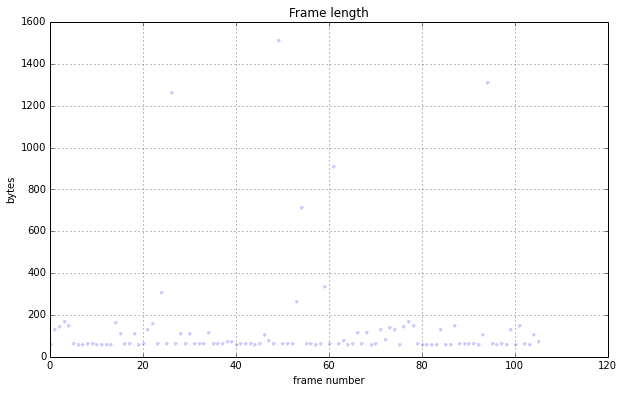

In [14]:
df["frame.len"].plot(style=".", alpha=0.2)
title("Frame length")
ylabel("bytes")
xlabel("frame number")

In [15]:
import subprocess
import datetime
import pandas as pd

def read_pcap(filename, fields=[], display_filter="", 
              timeseries=False, strict=False):
    if timeseries:
        fields = ["frame.time_epoch"] + fields
    fieldspec = " ".join("-e %s" % f for f in fields)

    display_filters = fields if strict else []
    if display_filter:
        display_filters.append(display_filter)
    filterspec = "-R '%s'" % " and ".join(f for f in display_filters)

    options = "-r %s -n -T fields -Eheader=y" % filename
    cmd = "tshark %s %s %s" % (options, filterspec, fieldspec)
    proc = subprocess.Popen(cmd, shell = True, 
                                 stdout=subprocess.PIPE)
    if timeseries:
        df = pd.read_table(proc.stdout, 
                        index_col = "frame.time_epoch", 
                        parse_dates=True, 
                        date_parser=datetime.datetime.fromtimestamp)
    else:
        df = pd.read_table(proc.stdout)
    return df

In [16]:
framelen=read_pcap("/home/rufina/Documents/github-dropbox/rename/session_challenger_dropboxdownload.pcap", ["frame.len"], timeseries=True)
framelen

,frame.len
frame.time_epoch,
2015-03-20 17:58:26.973763,60
2015-03-20 17:58:27.361116,134
2015-03-20 17:58:27.581481,145
2015-03-20 17:58:27.581536,173
2015-03-20 17:58:27.678116,150
2015-03-20 17:58:27.678150,66
2015-03-20 17:58:27.706334,60
2015-03-20 17:58:28.133916,60
2015-03-20 17:58:28.199718,66


In [17]:
bytes_per_second=framelen.resample("S", how="sum")

In [18]:
bytes_per_second.head()

,frame.len
frame.time_epoch,
2015-03-20 17:58:26,60
2015-03-20 17:58:27,728
2015-03-20 17:58:28,312
2015-03-20 17:58:29,3192
2015-03-20 17:58:30,4058


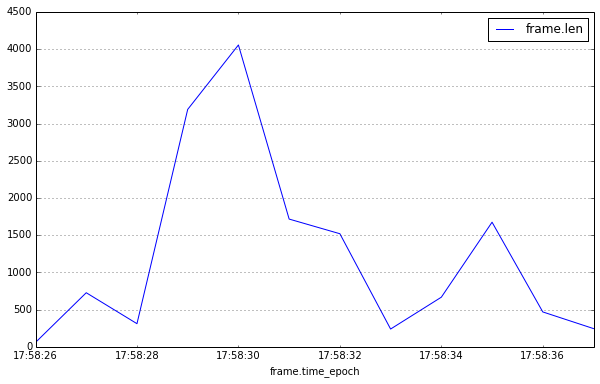

In [19]:
bytes_per_second.plot()

In [20]:
fields=["tcp.stream", "ip.src", "ip.dst", "tcp.seq", "tcp.ack", "tcp.window_size", "tcp.len"]
ts=read_pcap("/home/rufina/Documents/github-dropbox/rename/session_challenger_dropboxdownload.pcap", fields, timeseries=True, strict=True)
ts

,tcp.stream,ip.src,ip.dst,tcp.seq,tcp.ack,tcp.window_size,tcp.len
frame.time_epoch,,,,,,,
2015-03-20 17:58:27.361116,0,128.119.247.197,115.239.228.35,1,1,247,68
2015-03-20 17:58:27.678116,0,115.239.228.35,128.119.247.197,1,69,296,84
2015-03-20 17:58:27.678150,0,128.119.247.197,115.239.228.35,69,85,247,0
2015-03-20 17:58:28.199718,1,128.119.247.197,23.23.138.191,1,1,3825,0
2015-03-20 17:58:28.214136,1,23.23.138.191,128.119.247.197,1,2,149,0
2015-03-20 17:58:29.755232,2,128.119.247.197,216.58.219.229,1,1,1790,99
2015-03-20 17:58:29.755338,2,128.119.247.197,216.58.219.229,100,1,1790,46
2015-03-20 17:58:29.762625,2,216.58.219.229,128.119.247.197,1,100,752,0
2015-03-20 17:58:29.762653,2,216.58.219.229,128.119.247.197,1,146,752,0


In [42]:
stream=ts[ts["tcp.stream"] == 10]

In [43]:
stream

"<class 'pandas.tseries.index.DatetimeIndex'> Length: 0, Freq: None, Timezone: None",Empty DataFrame


In [44]:
per_stream=ts.groupby("tcp.stream")
per_stream.head()

tcp.stream           ip.src  \
tcp.stream frame.time_epoch                                          
0          2015-03-20 17:58:27.361116           0  128.119.247.197   
           2015-03-20 17:58:27.678116           0   115.239.228.35   
           2015-03-20 17:58:27.678150           0  128.119.247.197   
1          2015-03-20 17:58:28.199718           1  128.119.247.197   
           2015-03-20 17:58:28.214136           1    23.23.138.191   
2          2015-03-20 17:58:29.755232           2  128.119.247.197   
           2015-03-20 17:58:29.755338           2  128.119.247.197   
           2015-03-20 17:58:29.762625           2   216.58.219.229   
           2015-03-20 17:58:29.762653           2   216.58.219.229   
           2015-03-20 17:58:29.763000           2   216.58.219.229   
0          2015-03-20 17:58:29.864957           0  128.119.247.197   
3          2015-03-20 17:58:30.055723           3  128.119.247.197   
           2015-03-20 17:58:30.063028           3   216.58.219.238   
0          2015-03-20 17:58:30.168023           0   115.239.228.35   
4          2015-03-20 17:58:30.180022           4  128.119.247.197   
5          2015-03-20 17:58:30.407709           5  128.119.247.197   
           2015-03-20 17:58:30.417966           5    54.230.52.201   
4          2015-03-20 17:58:30.483546           4   115.239.228.35   
           2015-03-20 17:58:30.495374           4  128.119.247.197   
           2015-03-20 17:58:30.582109           4   115.239.228.35   
           2015-03-20 17:58:30.582184           4  128.119.247.197   
6          2015-03-20 17:58:30.695704           6  128.119.247.197   
           2015-03-20 17:58:30.769954           6     91.189.90.41   
           2015-03-20 17:58:34.921716           6  128.119.247.197   
           2015-03-20 17:58:34.996148           6     91.189.90.41   
           2015-03-20 17:58:34.996185           6  128.119.247.197   
7          2015-03-20 17:58:35.472398           7  128.119.247.197   
           2015-03-20 17:58:35.477243           7  128.119.247.197   
           2015-03-20 17:58:35.547516           7   108.160.166.20   
           2015-03-20 17:58:35.554591           7   108.160.166.20   
           2015-03-20 17:58:37.685848           7  128.119.247.197   

                                                ip.dst  tcp.seq  tcp.ack  \
tcp.stream frame.time_epoch                                                
0          2015-03-20 17:58:27.361116   115.239.228.35        1        1   
           2015-03-20 17:58:27.678116  128.119.247.197        1       69   
           2015-03-20 17:58:27.678150   115.239.228.35       69       85   
1          2015-03-20 17:58:28.199718    23.23.138.191        1        1   
           2015-03-20 17:58:28.214136  128.119.247.197        1        2   
2          2015-03-20 17:58:29.755232   216.58.219.229        1        1   
           2015-03-20 17:58:29.755338   216.58.219.229      100        1   
           2015-03-20 17:58:29.762625  128.119.247.197        1      100   
           2015-03-20 17:58:29.762653  128.119.247.197        1      146   
           2015-03-20 17:58:29.763000  128.119.247.197        1      146   
0          2015-03-20 17:58:29.864957   115.239.228.35       69       85   
3          2015-03-20 17:58:30.055723   216.58.219.238        1        1   
           2015-03-20 17:58:30.063028  128.119.247.197        1        2   
0          2015-03-20 17:58:30.168023  128.119.247.197       85      137   
4          2015-03-20 17:58:30.180022   115.239.228.35        0        1   
5          2015-03-20 17:58:30.407709    54.230.52.201        1        1   
           2015-03-20 17:58:30.417966  128.119.247.197        1        2   
4          2015-03-20 17:58:30.483546  128.119.247.197        1        1   
           2015-03-20 17:58:30.495374   115.239.228.35        1        1   
           2015-03-20 17:58:30.582109  128.119.247.197        1        1   
           2015-03-20 17:58:30.582184   115.239.228.35  

In [45]:
bytes_per_stream = per_stream["tcp.len"].sum()
bytes_per_stream.head()

tcp.stream
0              272
1                0
2             1822
3                0
4             4116
Name: tcp.len, dtype: int64

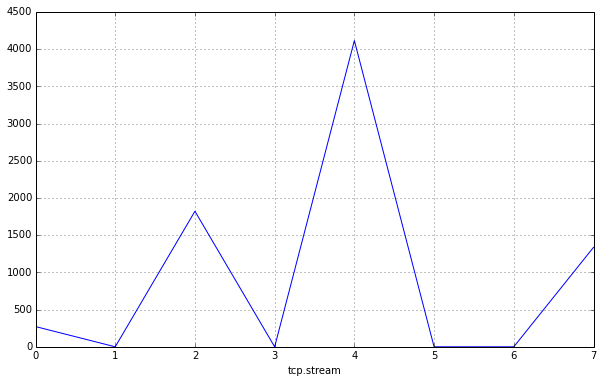

In [46]:
bytes_per_stream.plot()

In [47]:
bytes_per_stream.max()

4116

In [48]:
biggest_stream=bytes_per_stream.idxmax()
biggest_stream

4

In [49]:
bytes_per_stream.ix[biggest_stream]

4116